In [8]:
%pylab inline
import numpy as np
X_train_LSI = np.load('./data/X_train_LSI.npy')
X_test_LSI = np.load('./data/X_test_LSI.npy')
y_train_LSI = np.load('./data/y_train_LSI.npy')
y_test_LSI = np.load('./data/y_test_LSI.npy')

Populating the interactive namespace from numpy and matplotlib


In [9]:
from sklearn.linear_model import LogisticRegression
lrc = LogisticRegression()
y_pred = lrc.fit(X_train_LSI, y_train_LSI).predict(X_test_LSI)

In [10]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
precision = precision_score(y_test_LSI, y_pred, average=None)  
recall = recall_score(y_test_LSI, y_pred, average=None)
print 'accuracy: ', 1.0*sum(y_pred==y_test_LSI) / y_test_LSI.shape[0]
print 'precision: ', precision
print 'recall: ', recall

accuracy:  0.969206349206
precision:  [ 0.97716895  0.96165739]
recall:  [ 0.96025641  0.97798742]


In [11]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test_LSI, y_pred)

array([[1498,   62],
       [  35, 1555]])

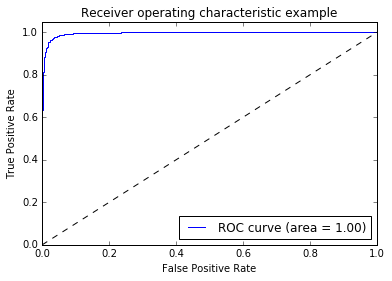

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp
y_score = lrc.decision_function(X_test_LSI)
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
fpr[0], tpr[0], _ = roc_curve(y_test_LSI, y_score)
roc_auc[0] = auc(fpr[0], tpr[0])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_LSI.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])


##############################################################################
# Plot of a ROC curve for a specific class
plt.figure()
plt.plot(fpr[0], tpr[0], label='ROC curve (area = %0.2f)' % roc_auc[0])
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()